<a href="https://colab.research.google.com/github/aemiralfath/BPML-Dicoding/blob/master/Submission_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import os
import sys
import shutil
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
! pip install --upgrade --force-reinstall --no-deps kaggle
! mkdir /root/.kaggle/
! cp "/content/drive/My Drive/Machine Learning/kaggle.json" /root/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

     |████████████████████████████████| 61kB 3.7MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=762208ec12149a531a50cb465ad28b01ba0748cb1494a4d75091cb45bbc5cf47
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [4]:
! kaggle datasets download -d mrgeislinger/asl-rgb-depth-fingerspelling-spelling-it-out

 99% 2.09G/2.11G [00:54<00:00, 53.7MB/s]
100% 2.11G/2.11G [00:54<00:00, 41.8MB/s]


In [2]:
zipref = zipfile.ZipFile('asl-rgb-depth-fingerspelling-spelling-it-out.zip', 'r')
zipref.extractall()
zipref.close()

In [94]:
base_dir = 'dataset5'
dataset_dir = os.listdir(base_dir)
label_dir = os.listdir(os.path.join(base_dir, dataset_dir[0]))

dataset_dir.sort()
label_dir.sort()

print(dataset_dir)
print(label_dir)

['A', 'B', 'C', 'D', 'E']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']


In [95]:
image_path = []
label = []

for dir_name in dataset_dir:
  dataset_path = os.path.join(base_dir, dir_name)

  for label_name in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label_name)

    for image_name in os.listdir(label_path):
      if image_name.startswith('color_'):
        image_path.append(os.path.join(label_path, image_name))
        label.append(label_name)

image_path = np.array(image_path)
label = np.array(label)
print(image_path.shape)
print(label.shape)

(65774,)
(65774,)


In [96]:
df = pd.DataFrame({'image_path':image_path, 'label':label})
df = df.sort_values(by=['image_path'])
df.tail()

,image_path,label
57867,dataset5/E/y/color_24_0518.png,y
58136,dataset5/E/y/color_24_0519.png,y
57844,dataset5/E/y/color_24_0520.png,y
58133,dataset5/E/y/color_24_0521.png,y
57985,dataset5/E/y/color_24_0522.png,y


In [97]:
size_image = []
min_width = sys.maxsize
max_width = 0
min_height = sys.maxsize
max_height = 0

for path in df['image_path']:
  image_name = Image.open(path)
  size_image.append(image_name.size)

  width, height = image_name.size
  if min_width > width:
    min_width = width

  if max_width < width:
    max_width = width

  if min_height > height:
    min_height = height

  if max_height < height:
    max_height = height

size_image = set(size_image)
print('resolusi image:', size_image)
print('min width:', min_width)
print('max width:', max_width)
print('min height:', min_height)
print('max height:', max_height)

resolusi image: {(157, 102), (90, 187), (143, 183), (110, 190), (147, 176), (185, 101), (80, 125), (100, 112), (191, 155), (104, 115), (67, 137), (100, 199), (137, 91), (119, 165), (104, 130), (123, 174), (160, 148), (80, 155), (133, 175), (136, 157), (137, 164), (156, 192), (66, 66), (86, 129), (199, 162), (184, 137), (132, 105), (189, 136), (136, 108), (65, 154), (156, 119), (160, 114), (71, 100), (109, 177), (146, 189), (75, 97), (113, 182), (95, 98), (99, 103), (118, 129), (142, 177), (145, 115), (165, 112), (94, 174), (131, 160), (169, 117), (98, 181), (84, 128), (88, 67), (179, 172), (108, 126), (71, 138), (112, 121), (141, 88), (108, 141), (127, 179), (164, 143), (112, 200), (131, 94), (64, 107), (84, 102), (140, 144), (141, 169), (70, 81), (74, 156), (93, 144), (150, 89), (188, 132), (140, 103), (69, 135), (144, 98), (73, 92), (164, 109), (150, 200), (117, 139), (154, 135), (103, 104), (106, 156), (79, 195), (82, 165), (135, 173), (83, 132), (102, 160), (173, 122), (177, 127), 

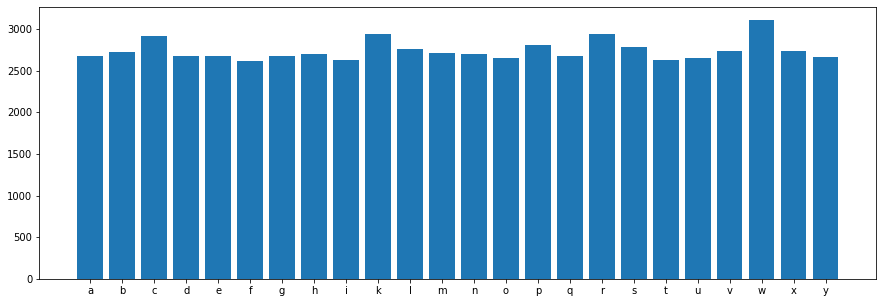

In [98]:
x, y = np.array([]), np.array([])
for label_name in label_dir:
  x = np.append(x, label_name)
  y = np.append(y, len(df.loc[df['label'] == label_name]))

plt.figure(figsize=(15, 5))
plt.bar(x, y)
plt.show()

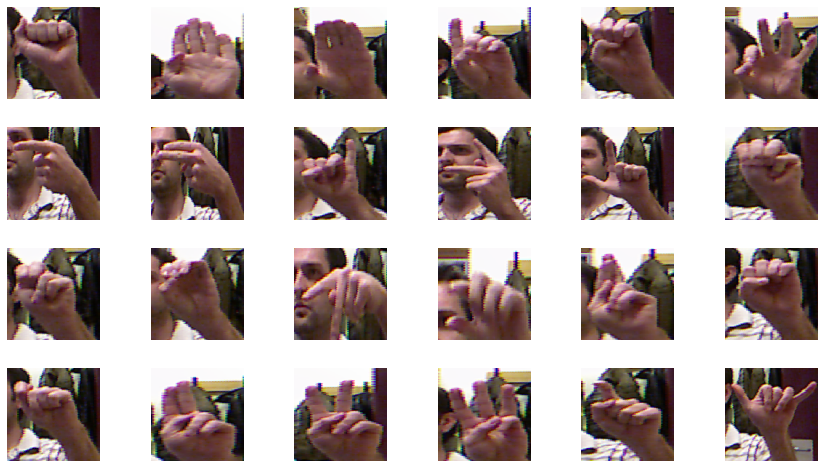

In [99]:
class ImageViewer:
    def draw_sample_images(self):
      fn = []
      for label_name in label_dir:
        samples = df[df['label']==label_name].iloc[0].values
        fn.append(samples[0])

      plt.figure(figsize=(15, 15))
      for n in range(len(fn)):
        plt.subplot(7, 6, n+1)
        plt.subplots_adjust(hspace = 0.3)
        plt.imshow(image.load_img(fn[n], target_size=(128, 128)))
        
        plt.axis('off')
      plt.show()
    
ImageViewer().draw_sample_images()

In [100]:
train_df = pd.DataFrame({'image_path':np.array([]), 'label':np.array([])})
test_df = pd.DataFrame({'image_path':np.array([]), 'label':np.array([])})

for label_name in label_dir:
  df_sample = df[df['label']==label_name]
  train_split, test_split = train_test_split(df_sample, test_size=0.2, random_state=42)
  train_df = pd.concat([train_df, train_split])
  test_df = pd.concat([test_df, test_split])

print('train size:', len(train_df))
print('test size:', len(test_df))

52609
13165


In [114]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=10,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip = True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [115]:
def make_dir(PATH):
  if not os.path.exists(PATH):
      os.mkdir(PATH)
      return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

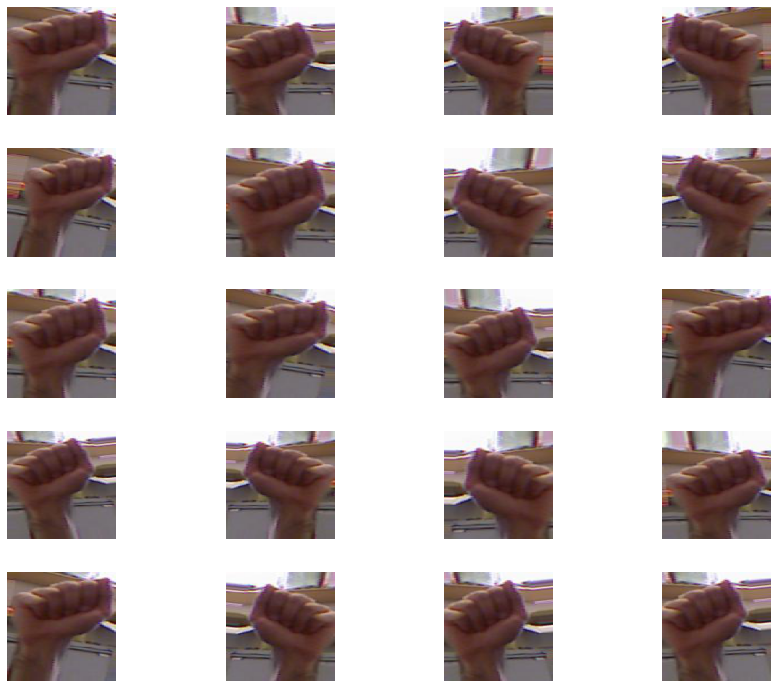

In [116]:
path_aug = train_df.iloc[1].values[0]
preview_dir = make_dir('/content/preview')

img_augmentation = image.load_img(path_aug)
x_aug = image.img_to_array(img_augmentation)
x_aug = x_aug.reshape((1,) + x_aug.shape)

i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='sign', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

preview_img = os.listdir(preview_dir)

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
  plt.subplot((len(preview_img)/4)+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                            color_mode="rgb",
                            target_size=(150, 150),
                            interpolation="nearest"))
  plt.axis('off')
plt.show()

for fn in preview_img:
  os.system(f'rm {os.path.join(preview_dir, fn)}')

In [117]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    batch_size=256,
    seed=42,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    target_size=(128, 128)
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='label',
    batch_size=256,
    seed=42,
    shuffle=True,
    color_mode="rgb",
    class_mode="categorical",
    target_size=(128, 128)
)

Found 52609 validated image filenames belonging to 24 classes.
Found 13165 validated image filenames belonging to 24 classes.


In [118]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(24, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_25 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 30, 30, 64)       

In [119]:
lr = 1e-2
epochs = 10
optimizer = tf.keras.optimizers.Adam(lr=lr)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [120]:
earlystopping = EarlyStopping(monitor='val_loss', patience = 5)

lr_schedule = LearningRateScheduler(
    lambda epoch: lr*10**(epoch)
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor = 'val_loss', 
    patience = 3,
    verbose = 1,
    factor = 0.5,
    min_lr = 0.0001
)

class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92:
      print("\n Reached 92%, stop training")
      self.model.stop_training = True

callbacks = MyCallback()

In [121]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//256,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.n//256,
    callbacks=[earlystopping, learning_rate_reduction, callbacks]  # earlystopping, learning_rate_reduction, callbacks, lr_schedule
) 

Epoch 1/10
205/205 [==============================] - 270s 1s/step - loss: 1.5317 - accuracy: 0.5387 - val_loss: 10.8880 - val_accuracy: 0.1186
Epoch 2/10
205/205 [==============================] - 270s 1s/step - loss: 0.5980 - accuracy: 0.8040 - val_loss: 0.8457 - val_accuracy: 0.7593
Epoch 3/10
205/205 [==============================] - 270s 1s/step - loss: 0.3776 - accuracy: 0.8758 - val_loss: 0.3760 - val_accuracy: 0.9102
Epoch 4/10
205/205 [==============================] - 269s 1s/step - loss: 0.2897 - accuracy: 0.9055 - val_loss: 0.2226 - val_accuracy: 0.9343
Epoch 5/10
205/205 [==============================] - ETA: 0s - loss: 0.2393 - accuracy: 0.9213
 Reached 92%, stop training
205/205 [==============================] - 270s 1s/step - loss: 0.2393 - accuracy: 0.9213 - val_loss: 0.1525 - val_accuracy: 0.9681


<Figure size 432x288 with 0 Axes>

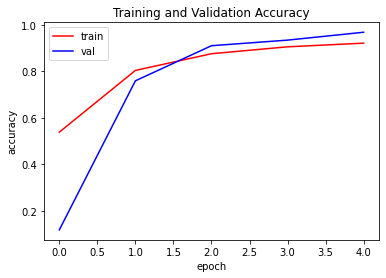

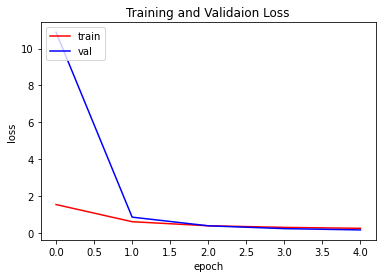

<Figure size 432x288 with 0 Axes>

In [122]:
%matplotlib inline

# plt.semilogx(history.history["lr"], history.history["loss"])
# plt.axis([lr, 1e+0, 0, 5])
# plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [ ]:
# Convert model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# Save model
with tf.io.gfile.GFile('model__v1.tflite', 'wb') as f:
  f.write(tflite_model)